# Importation des librairies

In [54]:
# OS
import sys

# NUMPY
import numpy as np

# STATS
import scipy.stats as stats
from scipy.stats import norm, skew

# MATPLOTLIB
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('fivethirtyeight') 

# WARNINGS
import warnings
warnings.filterwarnings('ignore')

# PANDAS
import pandas as pd 
pd.set_option("display.max_rows", None, "display.max_columns", None) 

# SEABORN
import seaborn as sns

# SCHIKIT-LEARN: PRE-PROCESSING
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # encodage des variables catégorielles nominales
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder # encodage des variables catégorielles ordinales
from sklearn.preprocessing import StandardScaler # normalisation des variables numériques
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer # imputation
from sklearn.impute import KNNImputer 


# SCHIKIT-LEARN: MODELES
from sklearn import linear_model
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso 
from sklearn.linear_model import ElasticNet

# SCHIKIT-LEARN: VALIDATION CROISEE + OPTIMISATION
from sklearn.model_selection import train_test_split # 
from sklearn.model_selection import cross_val_score # validation croisée pour comparaison entre modèles
from sklearn.model_selection import validation_curve # courbe de validation: visulaisr les scores lors du choix d'un hyperparamétre
from sklearn.model_selection import GridSearchCV # tester plusieurs hyper_paramètres
from sklearn.model_selection import learning_curve # courbe d'apprentissage: visualisation les scores du train et du validation sets en fonction des quanitiés des données
 
## EVALUATION
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
## EVALUATION
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

# SCHIKIT-LEARN: PIPELINE
from sklearn.pipeline import make_pipeline

# Chargement des données

In [2]:
import os
Titanic_data = pd.read_excel('C:/Users/cleme/Downloads/titanic3.xls')

# Description des données

In [3]:
Titanic_data.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [4]:
Titanic_data.tail(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.225,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.875,NaN,S,NaN,NaN,NaN


In [5]:
Titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [6]:
Titanic = Titanic_data.copy()

In [7]:
Titanic["sex"]

0       female
1         male
2       female
3         male
4       female
5         male
6       female
7         male
8       female
9         male
10        male
11      female
12      female
13      female
14        male
15        male
16        male
17      female
18      female
19        male
20        male
21      female
22        male
23      female
24      female
25        male
26        male
27      female
28      female
29        male
30        male
31        male
32      female
33      female
34        male
35      female
36      female
37        male
38        male
39        male
40        male
41      female
42      female
43      female
44      female
45        male
46        male
47        male
48      female
49        male
50      female
51        male
52        male
53        male
54        male
55      female
56        male
57      female
58        male
59      female
60        male
61      female
62        male
63      female
64        male
65      female
66      fe

In [8]:
Titanic["sex"]= [1 if i == "male" else 0 for i in Titanic["sex"]]

In [9]:
Titanic["sex"]

0       0
1       1
2       0
3       1
4       0
5       1
6       0
7       1
8       0
9       1
10      1
11      0
12      0
13      0
14      1
15      1
16      1
17      0
18      0
19      1
20      1
21      0
22      1
23      0
24      0
25      1
26      1
27      0
28      0
29      1
30      1
31      1
32      0
33      0
34      1
35      0
36      0
37      1
38      1
39      1
40      1
41      0
42      0
43      0
44      0
45      1
46      1
47      1
48      0
49      1
50      0
51      1
52      1
53      1
54      1
55      0
56      1
57      0
58      1
59      0
60      1
61      0
62      1
63      0
64      1
65      0
66      0
67      0
68      1
69      0
70      1
71      1
72      0
73      0
74      1
75      1
76      0
77      1
78      0
79      0
80      1
81      1
82      0
83      0
84      1
85      0
86      1
87      1
88      0
89      1
90      0
91      1
92      0
93      1
94      1
95      0
96      1
97      0
98      0
99      0


# Analyse exploratoire 

In [10]:
duplicate_Ti = Titanic[Titanic.duplicated()]
duplicate_Ti

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


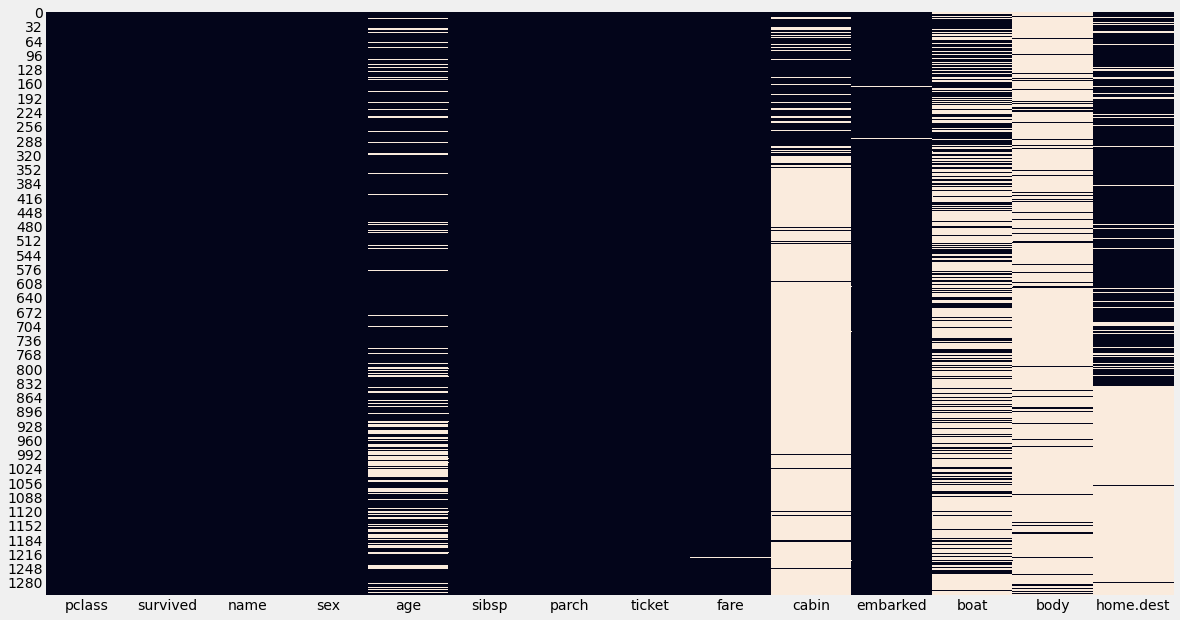

In [11]:
plt.figure(figsize=(18, 10))
sns.heatmap(Titanic.isna(), cbar=False)
plt.show()

In [12]:
del Titanic["body"]
del Titanic["home.dest"]
del Titanic["cabin"]

In [13]:
Titanic["boat"]

0             2
1            11
2           NaN
3           NaN
4           NaN
5             3
6            10
7           NaN
8             D
9           NaN
10          NaN
11            4
12            9
13            6
14            B
15          NaN
16          NaN
17            6
18            8
19            A
20            5
21            5
22            5
23            4
24            8
25          NaN
26            7
27            7
28            8
29            D
30          NaN
31            7
32            8
33            8
34          NaN
35            4
36            6
37            9
38          NaN
39          NaN
40          NaN
41            6
42            D
43            8
44            3
45          NaN
46          NaN
47            5
48            6
49            3
50            3
51          NaN
52          NaN
53          NaN
54            4
55            4
56            C
57            4
58          NaN
59            5
60          NaN
61            6
62      

In [14]:
Titanic['boat'] = Titanic['boat'].notna()

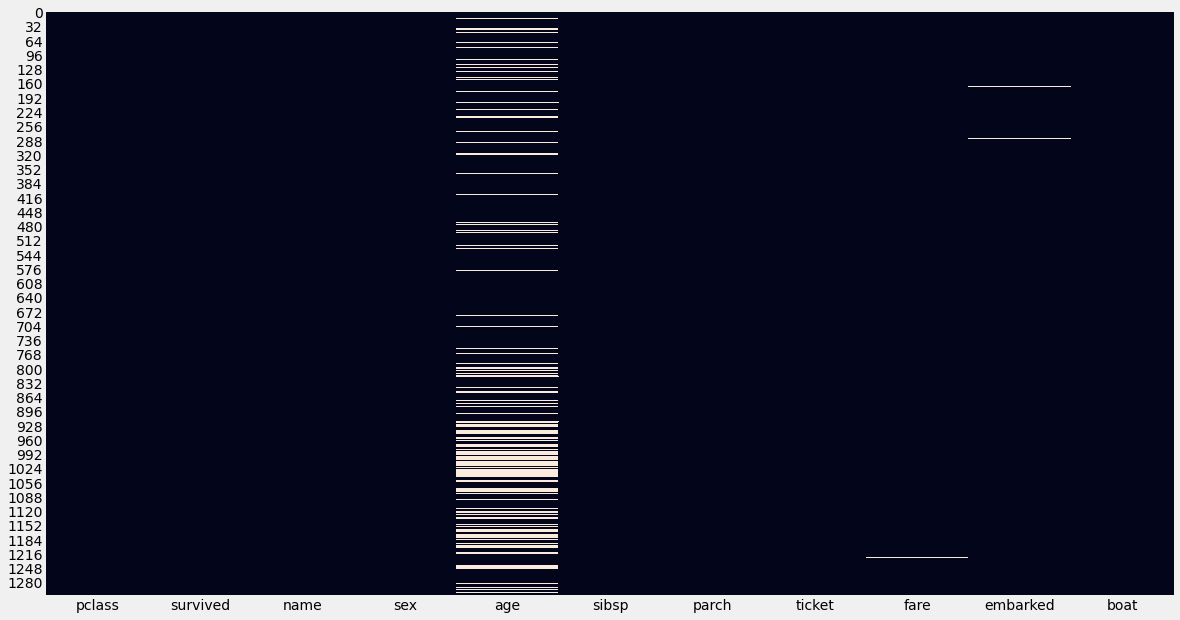

In [15]:
plt.figure(figsize=(18, 10))
sns.heatmap(Titanic.isna(), cbar=False)
plt.show()

In [16]:
del Titanic["embarked"]

In [17]:
Titanic['fare'][Titanic['fare'].isna()]

1225   NaN
Name: fare, dtype: float64

In [18]:
Titanic = Titanic[Titanic['fare'].notna()]

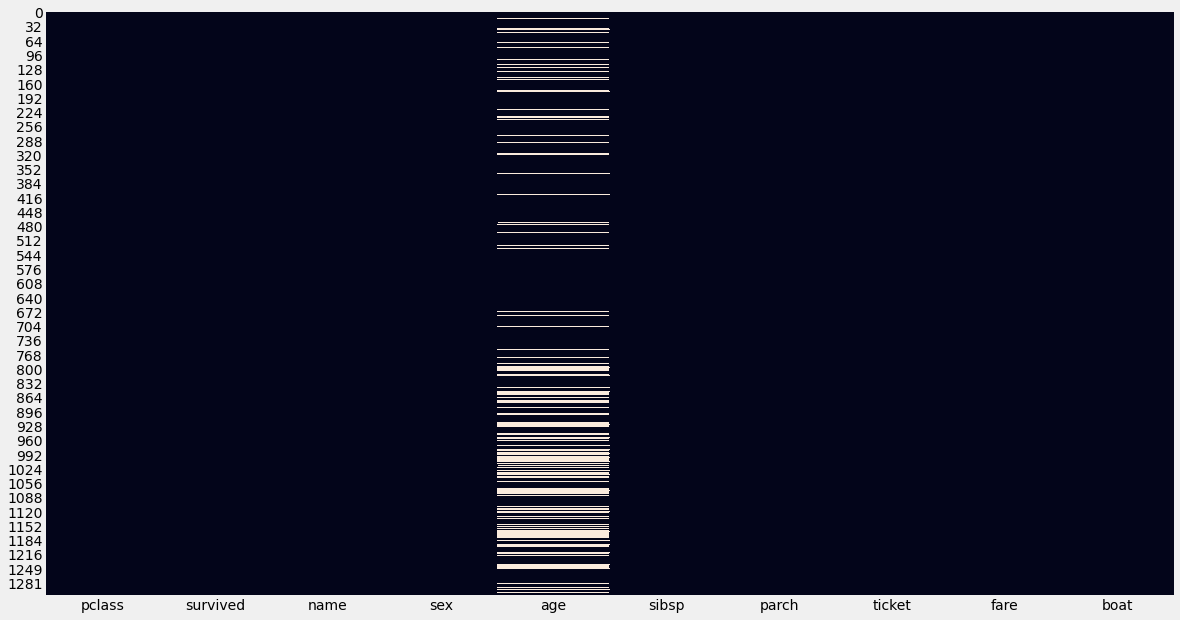

In [19]:
plt.figure(figsize=(18, 10))
sns.heatmap(Titanic.isna(), cbar=False)
plt.show()

# Variable cible

In [20]:
Titanic["survived"].value_counts()

0    808
1    500
Name: survived, dtype: int64

In [21]:
i = 0
for k in Titanic["survived"]:
    i += 1 if k == 0 else 0
print(i)
print (len(Titanic["survived"]))

808
1308


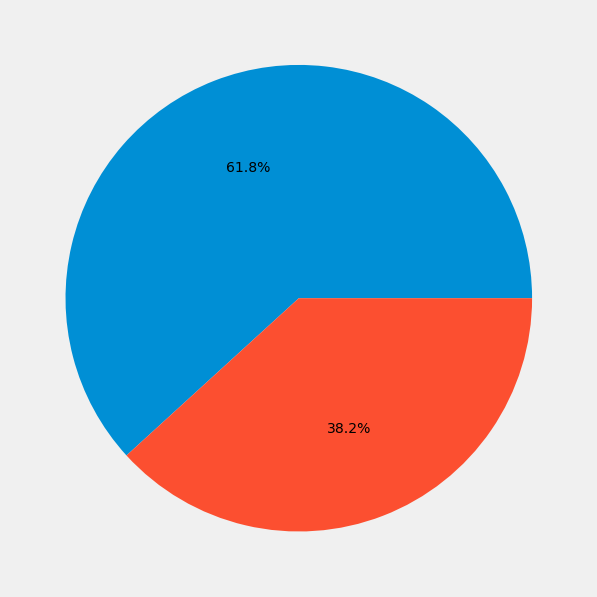

In [22]:
plt.figure(figsize=(18, 10))
plt.pie(Titanic["survived"].value_counts(), autopct='%1.1f%%')
plt.show()

# Analyse univariée

In [23]:
Titanic.dtypes.value_counts()

int64      5
float64    2
object     2
bool       1
dtype: int64

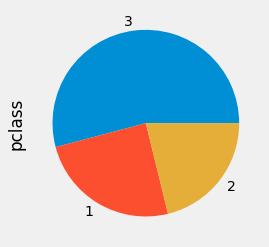

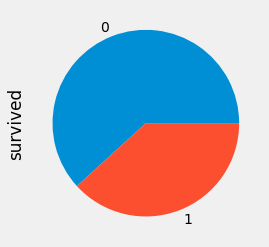

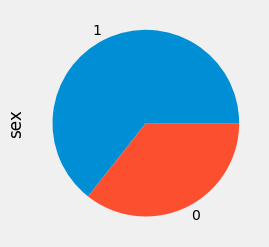

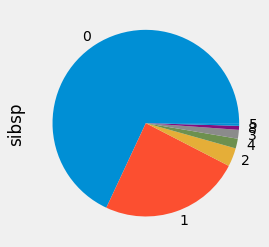

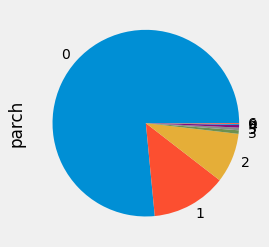

In [24]:
for feature in Titanic.select_dtypes('Int64'):
    plt.figure()
    Titanic[feature].value_counts().plot.pie()
    plt.show()

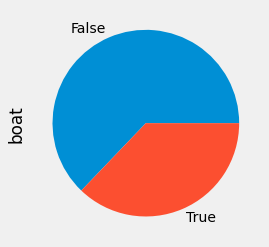

In [25]:
for feature in Titanic.select_dtypes('bool'):
    plt.figure()
    Titanic[feature].value_counts().plot.pie()
    plt.show()

# Distibution des variables numériques

In [26]:
Titanic.dtypes

pclass        int64
survived      int64
name         object
sex           int64
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
boat           bool
dtype: object

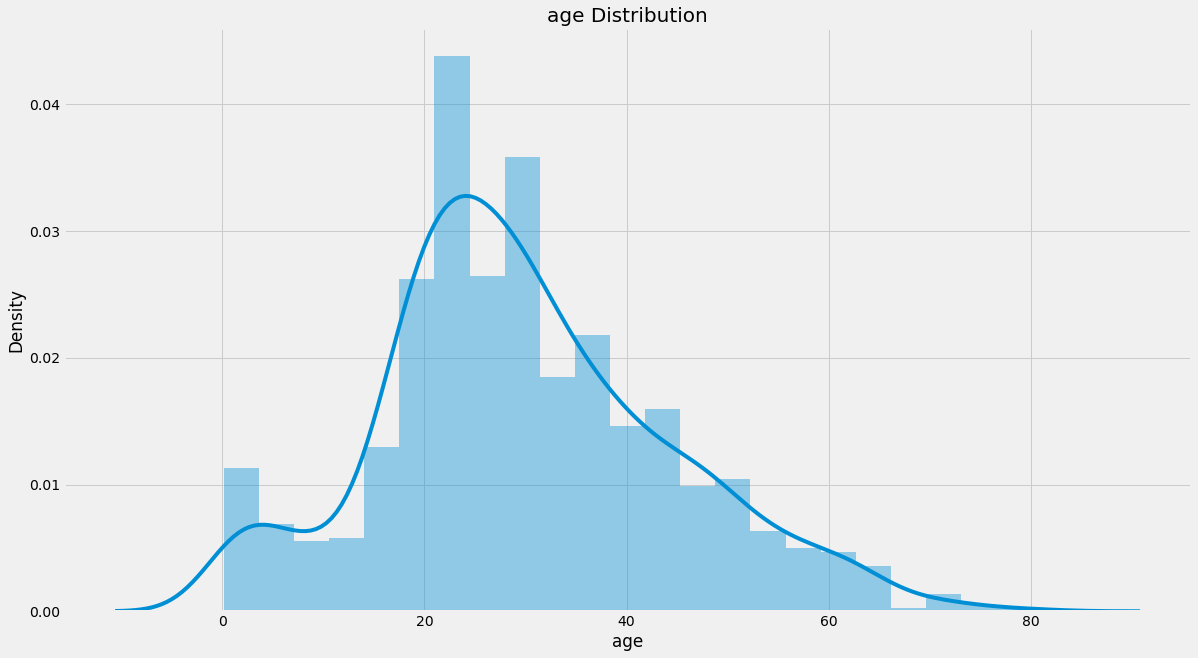

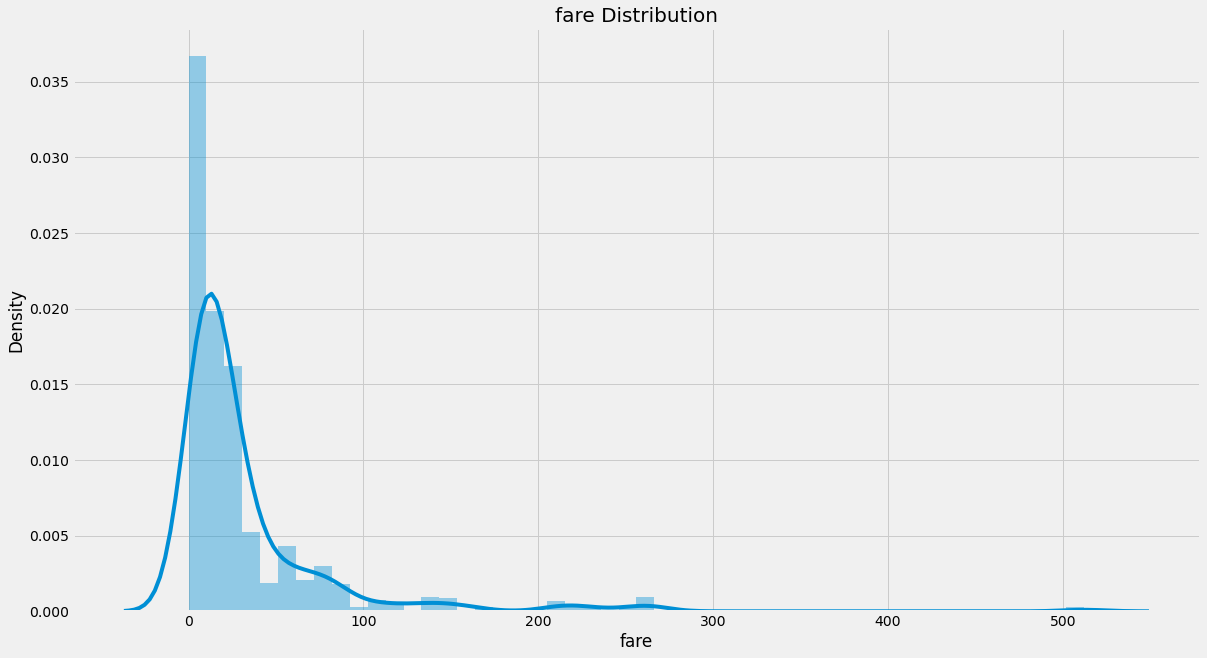

In [27]:
for feature in Titanic.select_dtypes('float64'):
    plt.figure(figsize=(18,10))
    sns.distplot(Titanic[feature])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

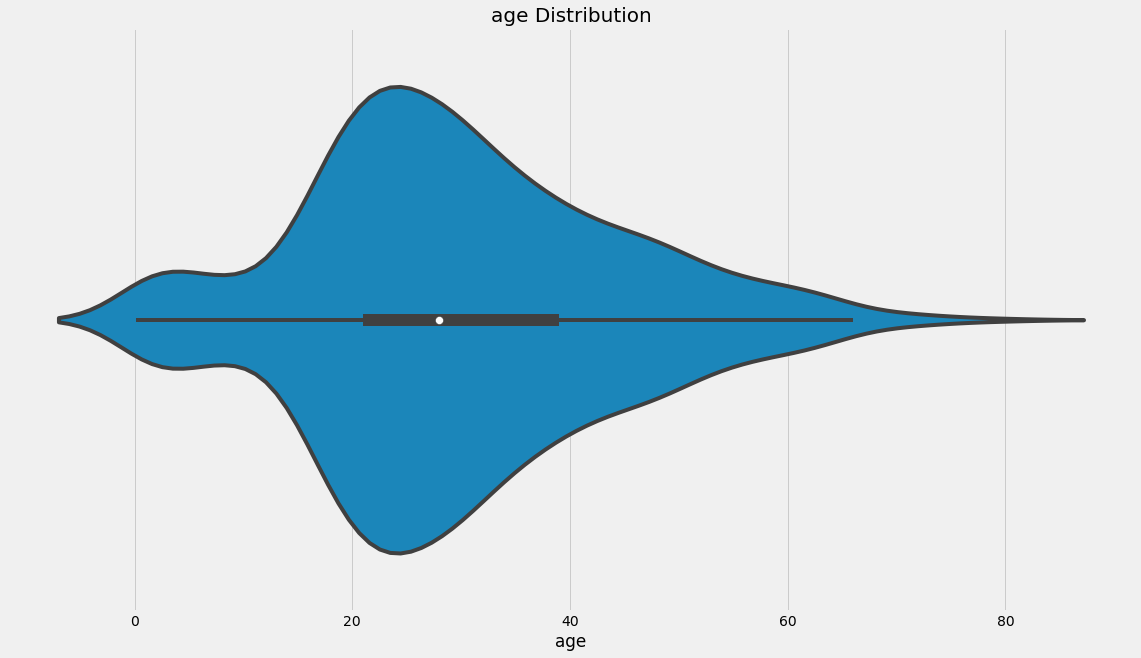

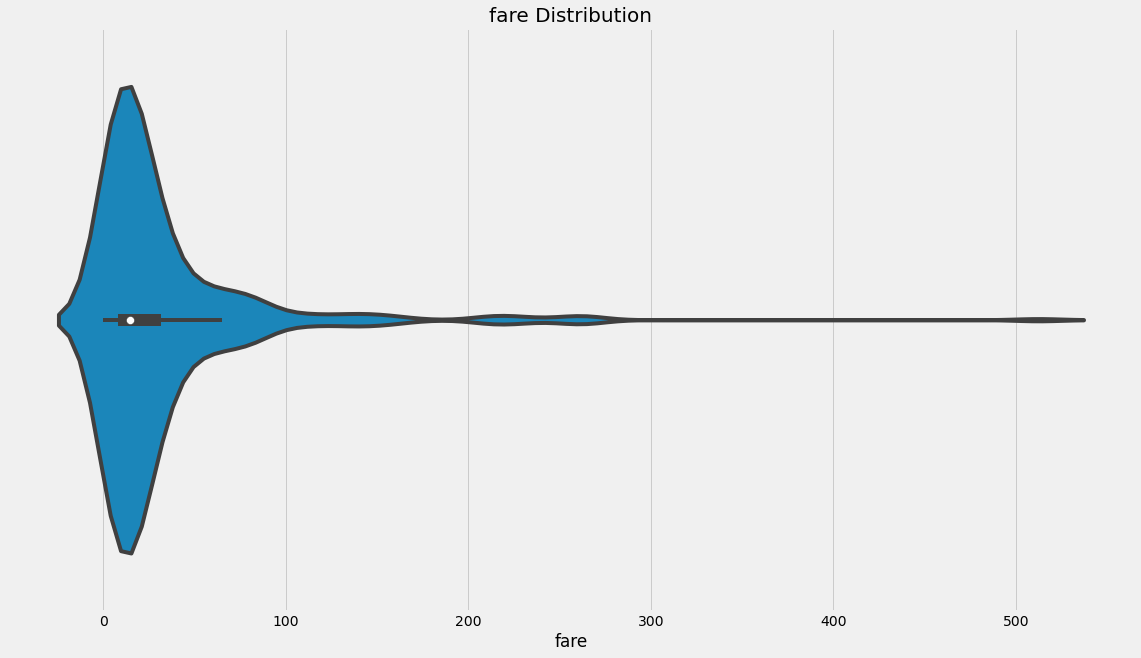

In [28]:
for feature in Titanic.select_dtypes('float64'):
    plt.figure(figsize=(18,10))
    sns.violinplot(Titanic[feature])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

# Corrélation 

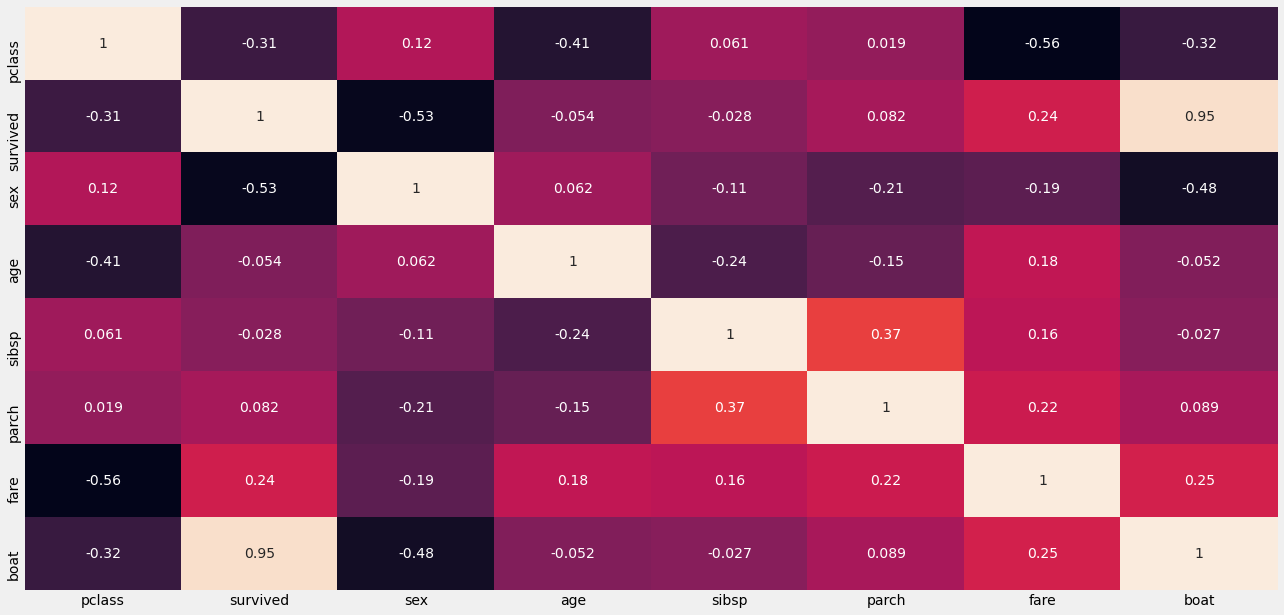

In [29]:
plt.figure(figsize=(20, 10))
sns.heatmap(Titanic.corr(), annot=True, cbar=False) #
plt.show()

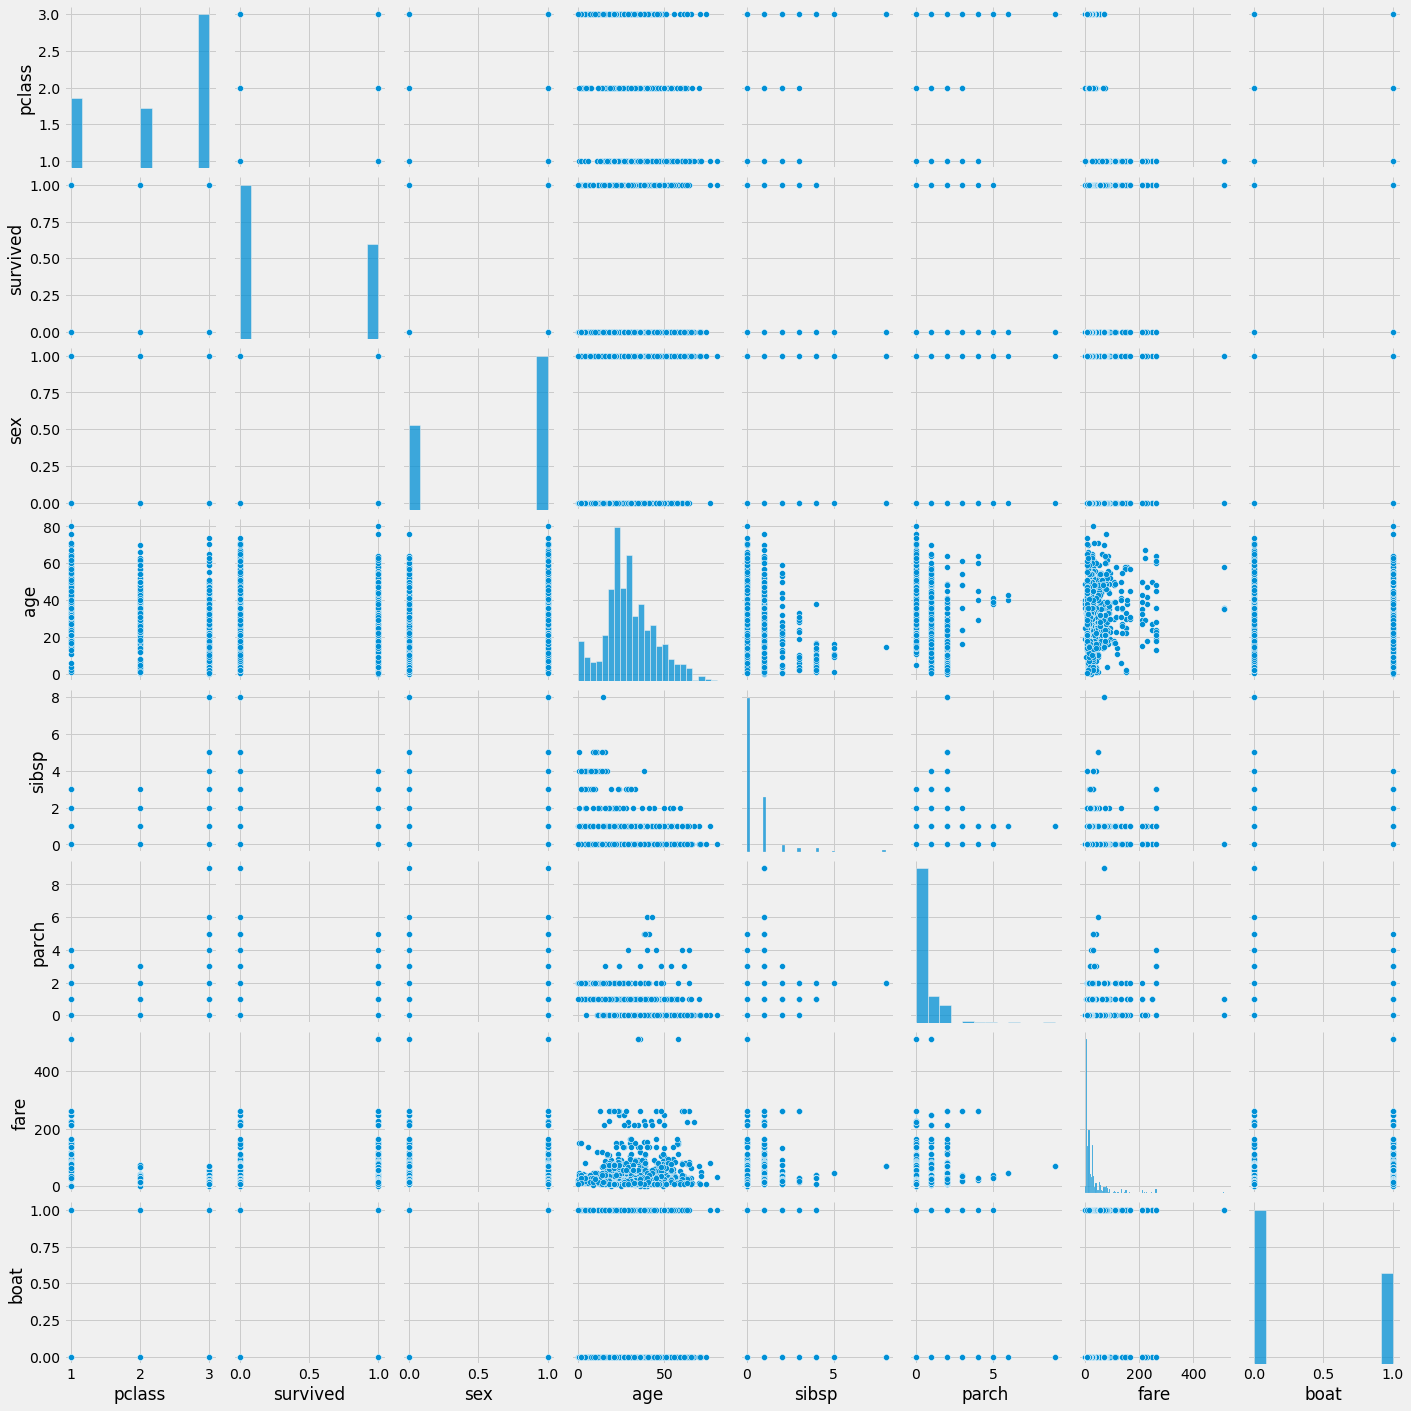

In [30]:
sns.pairplot(Titanic)
plt.show()

# Analyse bivariée

Text(0.5, 0, 'Age')

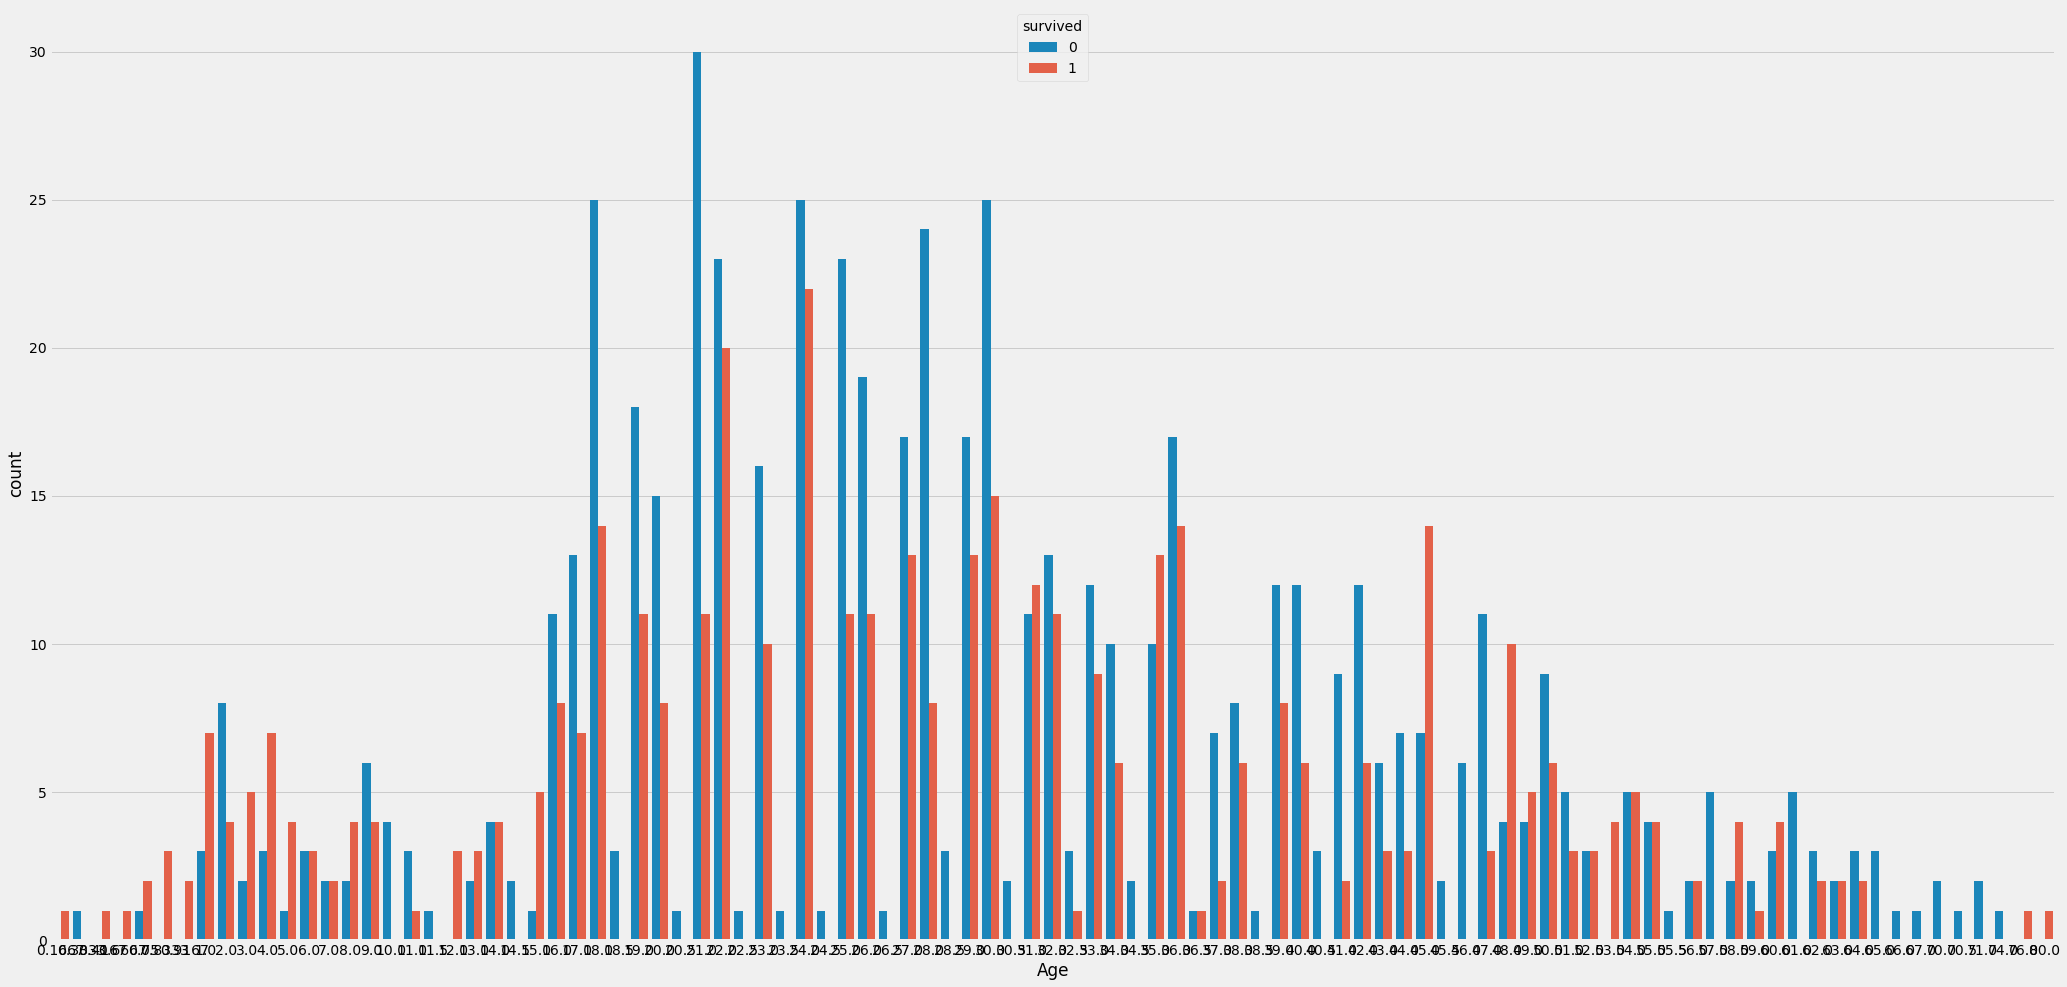

In [31]:
plt.figure(figsize=(32,16))
sns.countplot(x='age', data=Titanic, hue='survived')
plt.xlabel("Age")

Text(0.5, 0, 'boat')

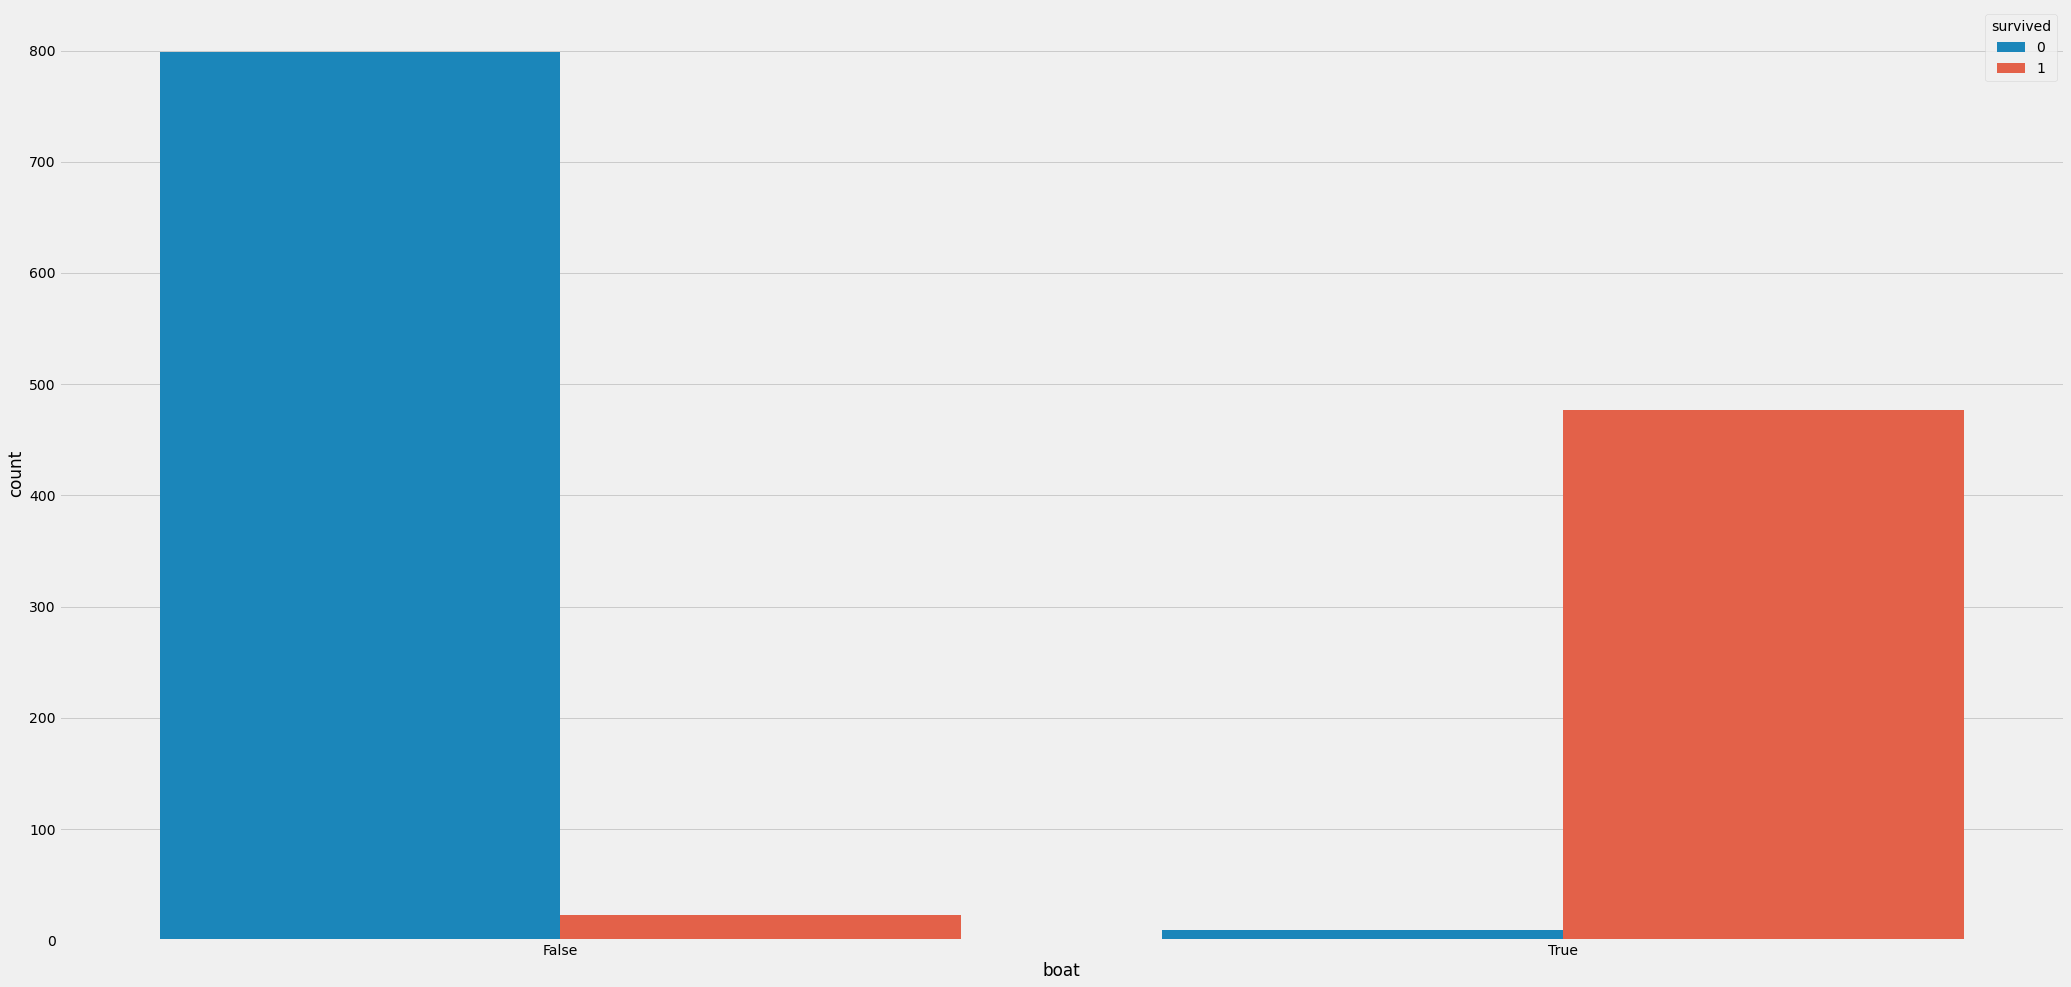

In [32]:
plt.figure(figsize=(32,16))
sns.countplot(x='boat', data=Titanic, hue='survived')
plt.xlabel("boat")

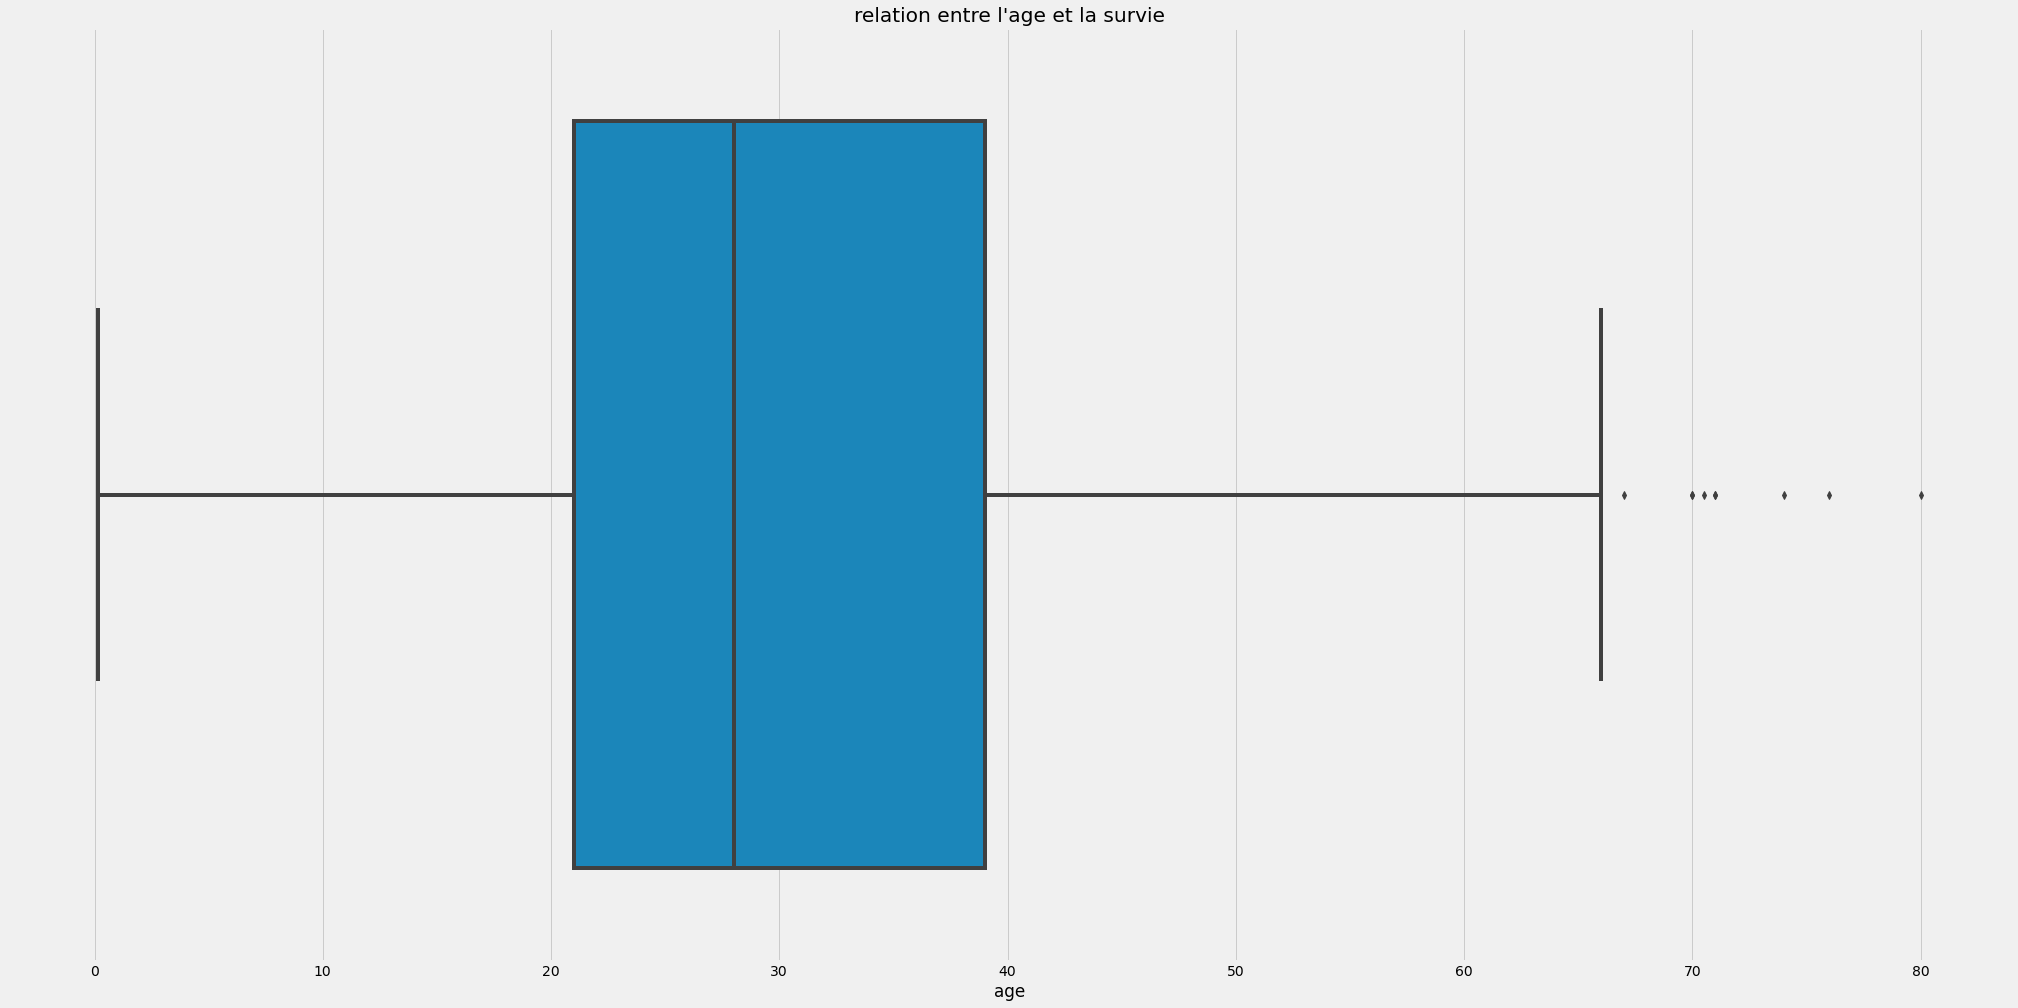

In [33]:
plt.figure(figsize=(32,16))
sns.boxplot(x='age', data=Titanic, hue='survived')
plt.title("relation entre l'age et la survie")
plt.show()

# Pré-Traitement

In [34]:
del Titanic['age']
del Titanic['sibsp']
del Titanic['parch']
del Titanic['name']
del Titanic['ticket']

In [35]:
pourcentages_manquement = (Titanic.isna().sum() / Titanic.shape[0])
pourcentages_manquement.sort_values(ascending=False)

boat        0.0
fare        0.0
sex         0.0
survived    0.0
pclass      0.0
dtype: float64

In [36]:
Titanic.isnull().sum().sort_values(ascending=False)

boat        0
fare        0
sex         0
survived    0
pclass      0
dtype: int64

In [37]:
cat_features = Titanic.select_dtypes("object", "int64").columns
cont_features = Titanic.select_dtypes(include=['float64']).columns

imput_cont = SimpleImputer(missing_values=np.nan, strategy='mean')
imput_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

for feature in cont_features :
    Titanic[feature] = imput_cont.fit_transform(Titanic[feature].values.reshape(-1,1)).ravel()
for feature in cat_features :
    Titanic[feature] = imput_cat.fit_transform(Titanic[feature].values.reshape(-1,1)).ravel()

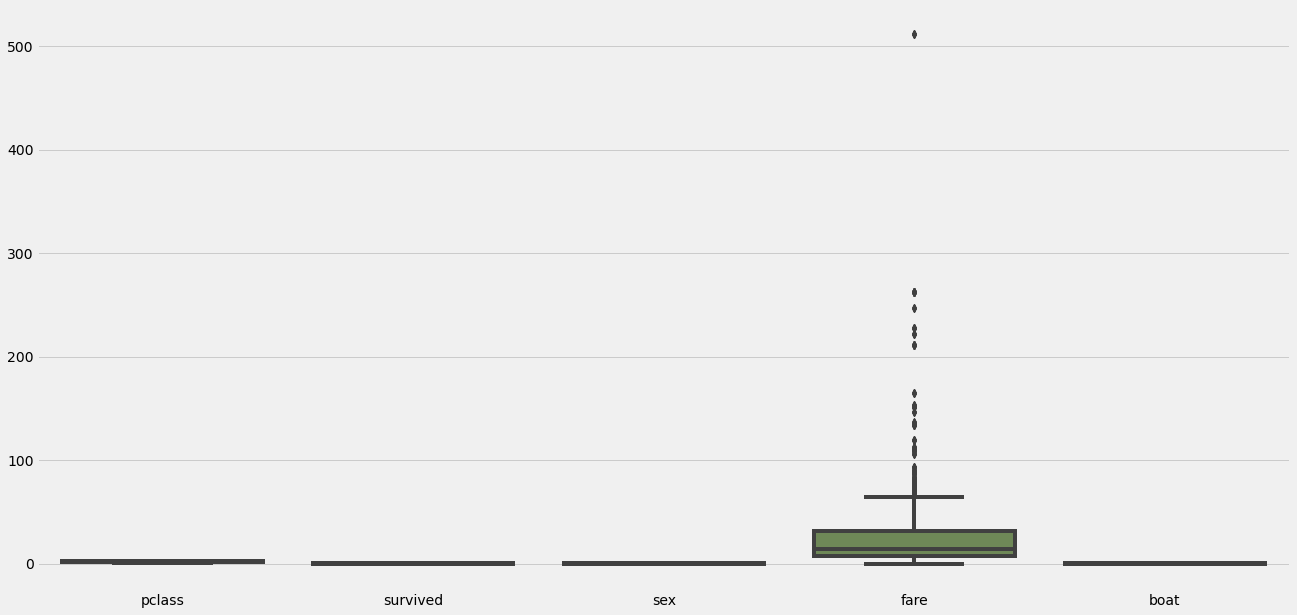

In [38]:
plt.figure(figsize=(20,10))
sns.boxplot(data=Titanic)
plt.show()

In [39]:
Titanic = Titanic[Titanic['fare'] < 200.]

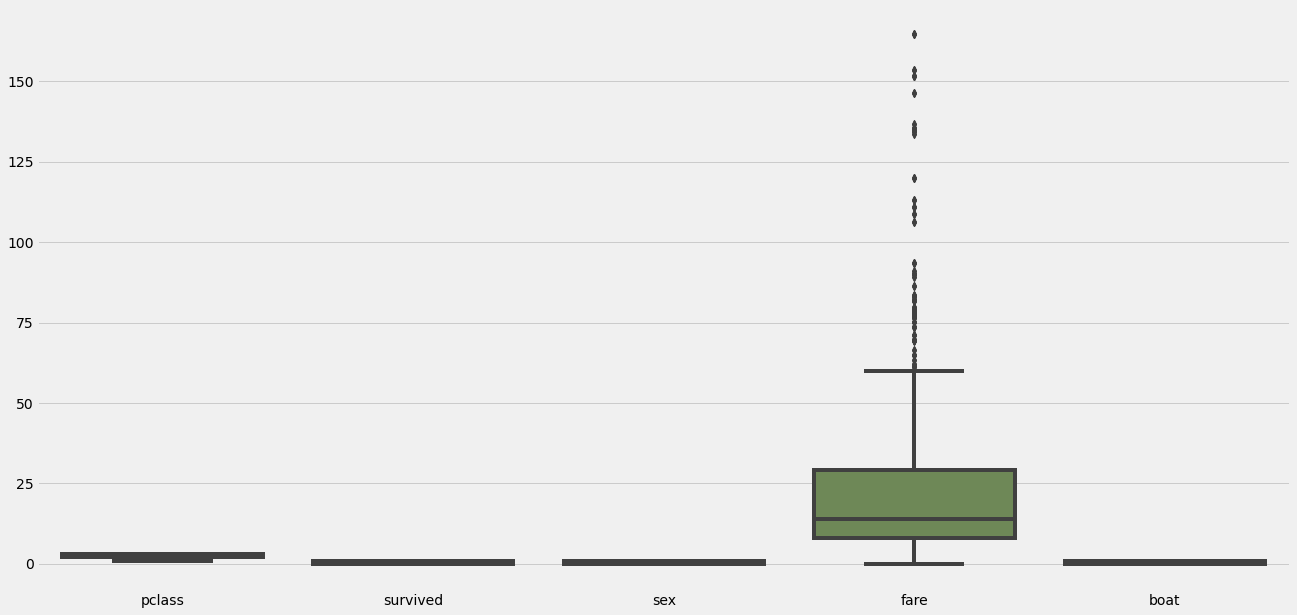

In [40]:
plt.figure(figsize=(20,10))
sns.boxplot(data=Titanic)
plt.show()

In [41]:
X = Titanic.drop('survived', axis=1)
y = Titanic['survived']

# X_train, X_test, y_train, y_test

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=120, stratify=y)

In [43]:
len(y_train), len(y_test)

(1016, 254)

In [44]:
(y_train==1).sum(), (y_train==0).sum(), (y_train==1).sum() / (y_train==0).sum()

(379, 637, 0.5949764521193093)

In [45]:
X_train.head()

,pclass,sex,fare,boat
301,1,1,34.0208,False
938,3,1,7.8542,False
322,1,0,135.6333,True
988,3,1,7.7500,False
47,1,1,26.2875,True


In [46]:
scale_minmax = MinMaxScaler()
scale_robust = RobustScaler()
# normaliser les données d'entrainement
for feature in cont_features:
    X_train[feature] = scale_minmax.fit_transform(X_train[feature].values.reshape(-1,1)).ravel()

In [47]:
# normaliser les donnéees de test
for feature in cont_features:
    X_test[feature] = scale_minmax.fit_transform(X_test[feature].values.reshape(-1,1)).ravel()

In [48]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=1206)

# Do the process
X_train_up, y_train_up = smt.fit_resample(X_train, y_train)

# Modélisation prédictive

In [50]:
# SCIKIT-LEARN: MODELES
from sklearn.linear_model import LogisticRegression

# models
logreg = LogisticRegression(penalty='none')
logregRidge = LogisticRegression(penalty='l2')
logregLasso = LogisticRegression(penalty='l1', solver='saga')
logregElasticNet = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.9)

In [51]:
dict_models = {"Reression logistique": logreg,
              "Regression logistique + Ridge": logregRidge,
              "Regression logistique + Lasso": logregLasso,
              "Regression logistique + Elastic Net": logregElasticNet
              }

# Prédiction et Evaluation

Régression logistique

Matrice de confusion:
[[157   2]
 [  5  90]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       159
           1       0.98      0.95      0.96        95

    accuracy                           0.97       254
   macro avg       0.97      0.97      0.97       254
weighted avg       0.97      0.97      0.97       254
 

Exactitude: 97.244094 



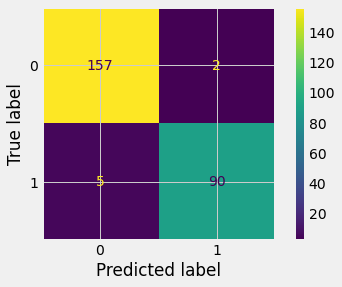

In [55]:
## régression logistique
logreg.fit(X_train_up, y_train_up)
y_pred = logreg.predict(X_test)

print('='*20)
print('Régression logistique')
print('='*20, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred)*100), '\n')
plot_confusion_matrix(logreg, X_test, y_test)
plt.show()

Régression logistique + Ridge

Matrice de confusion:
[[157   2]
 [  5  90]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       159
           1       0.98      0.95      0.96        95

    accuracy                           0.97       254
   macro avg       0.97      0.97      0.97       254
weighted avg       0.97      0.97      0.97       254
 

Exactitude: 97.244094 



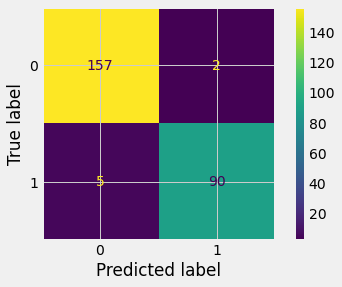

In [56]:
## régression logistique + ridge
logregRidge.fit(X_train_up, y_train_up)
y_pred = logregRidge.predict(X_test)

print('='*30)
print('Régression logistique + Ridge')
print('='*30, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred)*100), '\n')
plot_confusion_matrix(logreg, X_test, y_test)
plt.show()

Régression logistique + Lasso

Matrice de confusion:
[[157   2]
 [  5  90]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       159
           1       0.98      0.95      0.96        95

    accuracy                           0.97       254
   macro avg       0.97      0.97      0.97       254
weighted avg       0.97      0.97      0.97       254
 

Exactitude: 97.244094 



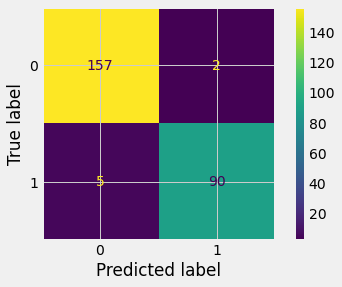

In [57]:
## régression logistique + Lasso
logregLasso.fit(X_train_up, y_train_up)
y_pred = logregLasso.predict(X_test)

print('='*30)
print('Régression logistique + Lasso')
print('='*30, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred)*100), '\n')
plot_confusion_matrix(logregLasso, X_test, y_test)
plt.show()

Régression logistique + Elastic Net

Matrice de confusion:
[[157   2]
 [  5  90]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       159
           1       0.98      0.95      0.96        95

    accuracy                           0.97       254
   macro avg       0.97      0.97      0.97       254
weighted avg       0.97      0.97      0.97       254
 

Exactitude: 97.244094 



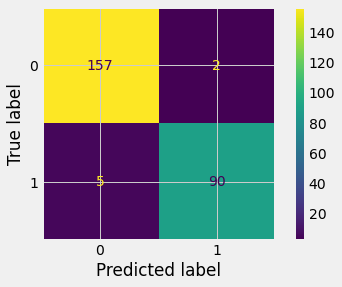

In [58]:
## régression logistique + elasticnet
logregElasticNet.fit(X_train_up, y_train_up)
y_pred = logregElasticNet.predict(X_test)

print('='*35)
print('Régression logistique + Elastic Net')
print('='*35, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred)*100), '\n')
plot_confusion_matrix(logregElasticNet, X_test, y_test)
plt.show()

# Rappel (Sensibilité) et spécificité de la régression 

In [59]:
## régression logistique
logreg.fit(X_train_up, y_train_up)
y_pred = logreg.predict(X_test)

cm = confusion_matrix(y_test,y_pred)

TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
sensibilite = TP / float(TP+FN)
specificite = TN / float(TN+FP)


In [60]:
print('Exactitude = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'Erreur de classification= 1- Exactitude= ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensibilité (True Positive Rate) = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificité (True Negative Rate) = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Précision (Positive Predictive value) = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n')

Exactitude = TP+TN/(TP+TN+FP+FN) =  0.9724409448818898 
 Erreur de classification= 1- Exactitude=  0.027559055118110187 
 Sensibilité (True Positive Rate) = TP/(TP+FN) =  0.9473684210526315 
 Specificité (True Negative Rate) = TN/(TN+FP) =  0.9874213836477987 
 Précision (Positive Predictive value) = TP/(TP+FP) =  0.9782608695652174 
 Negative predictive Value = TN/(TN+FN) =  0.9691358024691358 



In [62]:
y_pred_prob = logreg.predict_proba(X_test)[:,:]
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob de mort (0)','Prob de survie (1)'])
y_pred_prob_df.head()

,Prob de mort (0),Prob de survie (1)
0,0.993017,0.006983
1,0.793740,0.206260
2,0.000441,0.999559
3,0.000491,0.999509
4,0.993105,0.006895


In [63]:
param_grid = {'C': [1, 10, 100, 1000], 'max_iter': [100, 200, 300, 400]}
grid = GridSearchCV(logreg, param_grid, verbose=10, n_jobs=1, return_train_score=True)
# attention n_jobs=-1 va utiliser tous les CPUs
grid.fit(X_train_up, y_train_up)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START C=1, max_iter=100..........................................
[CV 1/5; 1/16] END ........................C=1, max_iter=100; total time=   0.0s
[CV 2/5; 1/16] START C=1, max_iter=100..........................................
[CV 2/5; 1/16] END ........................C=1, max_iter=100; total time=   0.0s
[CV 3/5; 1/16] START C=1, max_iter=100..........................................
[CV 3/5; 1/16] END ........................C=1, max_iter=100; total time=   0.0s
[CV 4/5; 1/16] START C=1, max_iter=100..........................................
[CV 4/5; 1/16] END ........................C=1, max_iter=100; total time=   0.0s
[CV 5/5; 1/16] START C=1, max_iter=100..........................................
[CV 5/5; 1/16] END ........................C=1, max_iter=100; total time=   0.0s
[CV 1/5; 2/16] START C=1, max_iter=200..........................................
[CV 1/5; 2/16] END ........................C=1, 

[CV 2/5; 13/16] END ....................C=1000, max_iter=100; total time=   0.0s
[CV 3/5; 13/16] START C=1000, max_iter=100......................................
[CV 3/5; 13/16] END ....................C=1000, max_iter=100; total time=   0.0s
[CV 4/5; 13/16] START C=1000, max_iter=100......................................
[CV 4/5; 13/16] END ....................C=1000, max_iter=100; total time=   0.0s
[CV 5/5; 13/16] START C=1000, max_iter=100......................................
[CV 5/5; 13/16] END ....................C=1000, max_iter=100; total time=   0.0s
[CV 1/5; 14/16] START C=1000, max_iter=200......................................
[CV 1/5; 14/16] END ....................C=1000, max_iter=200; total time=   0.0s
[CV 2/5; 14/16] START C=1000, max_iter=200......................................
[CV 2/5; 14/16] END ....................C=1000, max_iter=200; total time=   0.0s
[CV 3/5; 14/16] START C=1000, max_iter=200......................................
[CV 3/5; 14/16] END ........

GridSearchCV(estimator=LogisticRegression(penalty='none'), n_jobs=1,
             param_grid={'C': [1, 10, 100, 1000],
                         'max_iter': [100, 200, 300, 400]},
             return_train_score=True, verbose=10)

In [64]:
grid.best_params_

{'C': 1, 'max_iter': 100}

In [65]:
grid_logreg = grid.best_estimator_

In [66]:
predictions = grid_logreg.fit(X_train, y_train)

In [67]:
grid_logreg.score(X_train, y_train)

0.9753937007874016

In [68]:
grid_logreg.score(X_test, y_test)

0.9724409448818898

Régression logistique

Matrice de confusion:
[[157   2]
 [  5  90]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       159
           1       0.98      0.95      0.96        95

    accuracy                           0.97       254
   macro avg       0.97      0.97      0.97       254
weighted avg       0.97      0.97      0.97       254
 

Exactitude: 97.244094 



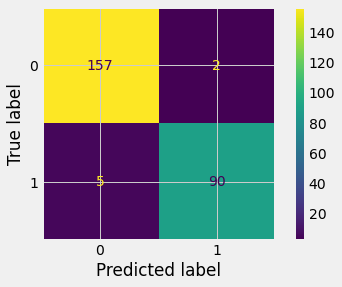

In [69]:
# performance de régression logistique avec GridSearchCV
y_pred = grid_logreg .predict(X_test)

print('='*20)
print('Régression logistique')
print('='*20, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred)*100), '\n')
plot_confusion_matrix(logreg, X_test, y_test)
plt.show()